In [1]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install -U vnstock

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install ta

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install keras-self-attention

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install optuna lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import numpy as np
import pandas as pd
from ta.momentum import RSIIndicator
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, RNN, concatenate
from tensorflow.keras.optimizers import RMSprop
from vnstock import *
from ta.volatility import BollingerBands
from tensorflow.keras.layers import Layer
import tensorflow as tf
from keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, Flatten, BatchNormalization
from sklearn.model_selection import RandomizedSearchCV
# from scikeras.wrappers import KerasClassifier

from ta.momentum import StochasticOscillator
from ta.volume import OnBalanceVolumeIndicator
from ta.trend import CCIIndicator
from sklearn.preprocessing import StandardScaler
from ta.volume import ChaikinMoneyFlowIndicator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras import regularizers
from keras_self_attention import SeqSelfAttention
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.saving import register_keras_serializable
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.svm import SVC
import seaborn as sns
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [10]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

In [11]:
from vnstock import *
import pandas as pd
import os
from collections import Counter
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.metrics import accuracy_score # Import accuracy_score

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from sklearn.metrics import log_loss

In [15]:
from xgboost import XGBClassifier

In [16]:
import optuna

In [17]:
import joblib

In [18]:
def dataframe_to_x_y(df, feature, target):
  X_train, y_train = [], []
  X_val, y_val = [], []
  n = len(df)
  split_index = int(n * 0.8)
  X_train = df[feature][:split_index]
  y_train = df[target][:split_index]
  X_val = df[feature][split_index:]
  y_val = df[target][split_index:]
  return X_train, y_train, X_val, y_val

In [23]:
# ta_feature = ['volume_ma','volume_to_volume_ma_ratio','ema_12','ema_26','sma_20','sma_50','roc_5','%K','%R','cci','obv','macd','signal_line','macd_histogram','rsi','bb_bbm','bb_bbh','bb_bbl','bb_bbp','bb_bbh_bb_bbl_ratio','rsi_vn30','rsi_base_ma_vn30','rsi_rsi_base_ma_ratio_vn30','volume_ma_vn30','volume_to_volume_ma_ratio_vn30','bb_bbm_vn30','bb_bbh_vn30','bb_bbl_vn30','bb_bbp_vn30','bb_bbh_bb_bbl_ratio_vn30','roc_vn30','%K_vn30','%R_vn30','cci_vn30','obv_vn30','ema_12_vn30','ema_26_vn30','sma_20_vn30','sma_50_vn30']
ta_features = ['volume_ma','volume_to_volume_ma_ratio','ema_12','ema_26','sma_20','sma_50','roc_5','roc_1','roc_9','%K','%R','cci','obv','macd','signal_line','macd_histogram','rsi','rsi_base_ma','rsi_rsi_base_ma_ratio','bb_bbm','bb_bbh','bb_bbl','bb_bbp','bb_bbh_bb_bbl_ratio','hl_ratio', 'co_ratio', 'price_range', 'sma_ratio_20_50', 'ema_ratio_12_26', 'bb_width', 'bb_position', 'rsi_overbought', 'rsi_oversold', 'rsi_neutral', 'macd_bullish', 'momentum_5', 'momentum_10','log_return','volatility_5d','volatility_10d','volatility_20d','volatility_30d','mean_log_return_5d','mean_log_return_10d','mean_log_return_20d','mean_log_return_30d','sharpe_like_5d','sharpe_like_10d','sharpe_like_20d','sharpe_like_30d','up_streak','pos_log_return_ratio_20d','z_score_5d','z_score_10d','z_score_20d','z_score_30d','annual_return','daily_return','sharpe_ratio',
               'rsi_vn30','rsi_base_ma_vn30','rsi_rsi_base_ma_ratio_vn30','volume_ma_vn30','volume_to_volume_ma_ratio_vn30','bb_bbm_vn30','bb_bbh_vn30','bb_bbl_vn30','bb_bbp_vn30','bb_bbh_bb_bbl_ratio_vn30','roc_1_vn30', 'roc_5_vn30', 'roc_9_vn30','%K_vn30','%R_vn30','cci_vn30','obv_vn30','ema_12_vn30','ema_26_vn30','sma_20_vn30','sma_50_vn30', 'hl_ratio_vn30', 'co_ratio_vn30', 'price_range_vn30', 'sma_ratio_20_50_vn30', 'ema_ratio_12_26_vn30', 'bb_width_vn30', 'bb_position_vn30', 'rsi_overbought_vn30', 'rsi_oversold_vn30', 'rsi_neutral_vn30', 'momentum_5_vn30', 'momentum_10_vn30', 'log_return_vn30','volatility_5d_vn30','volatility_10d_vn30','volatility_20d_vn30','volatility_30d_vn30','mean_log_return_5d_vn30','mean_log_return_10d_vn30','mean_log_return_20d_vn30','mean_log_return_30d_vn30','sharpe_like_5d_vn30','sharpe_like_10d_vn30','sharpe_like_20d_vn30','sharpe_like_30d_vn30','up_streak_vn30','pos_log_return_ratio_20d_vn30','z_score_5d_vn30','z_score_10d_vn30','z_score_20d_vn30','z_score_30d_vn30','annual_return_vn30','daily_return_vn30','sharpe_ratio_vn30',
               'rsi_vni','rsi_base_ma_vni','rsi_rsi_base_ma_ratio_vni','volume_ma_vni','volume_to_volume_ma_ratio_vni','bb_bbm_vni','bb_bbh_vni','bb_bbl_vni','bb_bbp_vni','bb_bbh_bb_bbl_ratio_vni','roc_1_vni', 'roc_5_vni', 'roc_9_vni','%K_vni','%R_vni','cci_vni','obv_vni','ema_12_vni','ema_26_vni','sma_20_vni','sma_50_vni', 'hl_ratio_vni', 'co_ratio_vni', 'price_range_vni', 'sma_ratio_20_50_vni', 'ema_ratio_12_26_vni', 'bb_width_vni', 'bb_position_vni', 'rsi_overbought_vni', 'rsi_oversold_vni', 'rsi_neutral_vni', 'momentum_5_vni', 'momentum_10_vni','log_return_vni','volatility_5d_vni','volatility_10d_vni','volatility_20d_vni','volatility_30d_vni','mean_log_return_5d_vni','mean_log_return_10d_vni','mean_log_return_20d_vni','mean_log_return_30d_vni','sharpe_like_5d_vni','sharpe_like_10d_vni','sharpe_like_20d_vni','sharpe_like_30d_vni','up_streak_vni','pos_log_return_ratio_20d_vni','z_score_5d_vni','z_score_10d_vni','z_score_20d_vni','z_score_30d_vni','annual_return_vni','daily_return_vni','sharpe_ratio_vni']
fa_features = ['p/b_previous_quarter', 'p/b_change_rate','p/b_change_rate_flag','p/e_previous_quarter','p/e_change_rate','p/e_change_rate_flag','p/s_previous_quarter','p/s_change_rate','p/s_change_rate_flag','p/cash_flow_previous_quarter','p/cash_flow_change_rate','p/cash_flow_change_rate_flag','eps_previous_quarter','eps_change_rate', 'eps_change_rate_flag','bvps_previous_quarter','bvps_change_rate', 'bvps_change_rate_flag','roe_previous_quarter','roe_change_rate','roe_change_rate_flag','roa_previous_quarter','roa_change_rate','roa_change_rate_flag','coefficient_p/b','coefficient_p/e','coefficient_p/s','coefficient_p/cash_flow','coefficient_eps','coefficient_bvps','coefficient_roe','coefficient_roa','distance_to_nearest_quarter']
sentiment_columns = [
        'Reputation', 'Company Communication', 'Appointment', 'Financial', 'Regulatory',
        'Sales', 'M&A', 'Legal', 'Dividend Policy', 'Risks', 'Rumors', 'Strategy',
        'Options', 'IPO', 'Signal', 'Coverage', 'Fundamentals', 'Insider Activity',
        'Price Action', 'Buyside', 'Technical Analysis', 'Trade', 'Central Banks',
        'Currency', 'Conditions', 'Market', 'Volatility', 'Investor Sentiment', 'Retail Investor Behavior',
        'Speculation', 'Domestic Institutional Behavior', 'Foreign Institutional Behavior', 'Black Swan Event',
    ]

sentiment_p1d_columns = [
        'reputation_p1d', 'company_communication_p1d', 'appointment_p1d', 'financial_p1d', 'regulatory_p1d',
        'sales_p1d', 'm&a_p1d', 'legal_p1d', 'dividend_policy_p1d', 'risks_p1d', 'rumors_p1d', 'strategy_p1d',
        'options_p1d', 'ipo_p1d', 'signal_p1d', 'coverage_p1d', 'fundamentals_p1d', 'insider_activity_p1d',
        'price_action_p1d', 'buyside_p1d', 'technical_analysis_p1d', 'trade_p1d', 'central_banks_p1d',
        'currency_p1d', 'conditions_p1d', 'market_p1d', 'volatility_p1d', 'investor_sentiment_p1d', 'retail_investor_behavior_p1d',
        'speculation_p1d', 'domestic_institutional_behavior_p1d', 'foreign_institutional_behavior_p1d', 'black_swan_event_p1d',
    ]
meta_cols = ['num_sa_news', 'mean_sentiment_norm', 'max_sentiment_norm', 'std_sentiment_score', 'sum_positive_sa', 'sum_negative_sa', 'time_distance_from_sa_to_close_minutes']
meta_p1d_cols = ['num_sa_news_p1d', 'mean_sentiment_norm_p1d', 'max_sentiment_norm_p1d', 'std_sentiment_score_p1d', 'sum_positive_sa_p1d', 'sum_negative_sa_p1d', 'time_distance_from_sa_to_close_minutes_p1d']

sentiment_features = sentiment_columns + sentiment_p1d_columns + meta_cols + meta_p1d_cols
ta_fa_features = ta_features + fa_features
target = 'target'
scaler = StandardScaler()

In [24]:
def load_data_for_analysis(tickers, folder_path):

    df_all = []

    for ticker in tickers:
        file_path = os.path.join(folder_path, f"{ticker}.xlsx")
        if os.path.exists(file_path):
            df = pd.read_excel(file_path)
            df["ticker"] = ticker  # thêm cột ticker
            df_all.append(df)
        else:
            print(f"⚠️ Không tìm thấy: {file_path}")

    # Gộp lại thành 1 DataFrame
    df_global = pd.concat(df_all, ignore_index=True)
    print(f"✅ Đã load xong {len(df_global)} dòng dữ liệu từ {len(df_all)} cổ phiếu.")
    return df_global

In [25]:
tickers = ['ACB', 'BCM', 'BID','BVH','CTG','FPT','GAS','GVR','HDB','HPG',
                    'LPB','MBB','MSN','MWG','PLX','SAB','SHB','SSB','SSI','STB',
                    'TCB','TPB','VCB','VHM','VIB','VIC','VJC','VNM','VPB','VRE']
folder_path_train = r"D:\thacsi\TAILIEULUANVAN\code\PredictStock_TA_FA_SA\TA_FA_SA\data\v6\stock_trend\train_data" 
folder_path_test = r"D:\thacsi\TAILIEULUANVAN\code\PredictStock_TA_FA_SA\TA_FA_SA\data\v6\stock_trend\test_data" 
df_global_train = load_data_for_analysis(tickers, folder_path_train)
df_global_test = load_data_for_analysis(tickers, folder_path_test)


✅ Đã load xong 35865 dòng dữ liệu từ 30 cổ phiếu.
✅ Đã load xong 7380 dòng dữ liệu từ 30 cổ phiếu.


In [26]:
df_global_train_in_scope_features = df_global_train[ta_fa_features]

In [29]:
df_global_train_in_scope_target = df_global_train[target]

============================================================== Feature selection for FA + FA=============================================================


✅ BƯỚC 1: Filter sơ bộ – loại bỏ nhiễu, feature vô dụng

In [27]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [32]:
TOP_K = 150

# 1. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_global_train_in_scope_features)
X_scaled_df = pd.DataFrame(X_scaled, columns=df_global_train_in_scope_features.columns)

# 3. Tính Mutual Information giữa feature và label
mi_scores = mutual_info_classif(X_scaled_df, df_global_train_in_scope_target)
mi_series = pd.Series(mi_scores, index=X_scaled_df.columns).sort_values(ascending=False)

# 4. Chọn top K feature quan trọng nhất
top_features = mi_series.head(TOP_K).index.tolist()

print("Top 80 features được chọn:")
for i, feature in enumerate(top_features, 1):
    print(f"{i}. {feature}")

Top 80 features được chọn:
1. mean_log_return_30d_vn30
2. roc_1_vn30
3. volatility_10d_vn30
4. rsi_base_ma_vni
5. z_score_10d_vni
6. sma_20_vn30
7. volume_to_volume_ma_ratio_vni
8. sharpe_ratio_vni
9. volume_to_volume_ma_ratio_vn30
10. bb_bbm_vn30
11. price_range_vn30
12. bb_bbh_vni
13. sma_50_vni
14. ema_12_vn30
15. volatility_5d_vn30
16. mean_log_return_10d_vn30
17. annual_return_vni
18. volatility_5d_vni
19. log_return_vn30
20. z_score_5d_vni
21. volatility_30d_vni
22. rsi_rsi_base_ma_ratio_vni
23. obv_vni
24. bb_bbl_vn30
25. rsi_base_ma_vn30
26. sharpe_like_20d_vni
27. rsi_vni
28. volatility_20d_vni
29. z_score_20d_vn30
30. daily_return_vn30
31. roc_1_vni
32. roc_9_vn30
33. bb_width_vni
34. z_score_30d_vn30
35. roc_5_vn30
36. ema_ratio_12_26_vn30
37. cci_vn30
38. sma_ratio_20_50_vn30
39. cci_vni
40. sharpe_like_20d_vn30
41. sharpe_like_30d_vn30
42. hl_ratio_vn30
43. bb_bbm_vni
44. bb_bbp_vn30
45. sma_20_vni
46. obv_vn30
47. annual_return_vn30
48. mean_log_return_20d_vn30
49. ema_26

✅ BƯỚC 2: Embedded Method – Lấy importance từ mô hình

In [44]:
from xgboost import XGBClassifier
import pandas as pd

# Fit model để lấy importance
xgb = XGBClassifier(n_jobs=-1, random_state=42)
xgb.fit(df_global_train_in_scope_features[ta_fa_features], df_global_train_in_scope_target)

# Lấy top 100 feature quan trọng
feat_importance = pd.Series(xgb.feature_importances_, index=ta_fa_features).sort_values(ascending=False)
selected_by_xgb = feat_importance.head(100).index.tolist()

In [45]:
print("Top 100 features được chọn:")
for i, feature in enumerate(selected_by_xgb, 1):
    print(f"{i}. {feature}")

Top 100 features được chọn:
1. momentum_5_vni
2. price_range
3. volatility_10d
4. ema_26_vni
5. co_ratio_vn30
6. volatility_30d
7. momentum_5_vn30
8. %K_vni
9. cci_vni
10. ema_12_vni
11. mean_log_return_10d_vn30
12. mean_log_return_10d_vni
13. ema_26_vn30
14. sma_50_vni
15. volatility_20d
16. z_score_20d_vni
17. price_range_vni
18. bb_bbl_vn30
19. bb_bbm_vn30
20. mean_log_return_30d_vni
21. sharpe_like_20d_vni
22. sharpe_ratio_vn30
23. roc_5_vni
24. z_score_5d_vn30
25. roc_1_vni
26. z_score_10d_vn30
27. annual_return_vni
28. sharpe_like_5d_vni
29. cci_vn30
30. mean_log_return_20d_vni
31. ema_ratio_12_26_vn30
32. rsi_rsi_base_ma_ratio_vn30
33. volume_ma_vni
34. sma_50_vn30
35. bb_bbh_vn30
36. rsi_vni
37. volatility_30d_vni
38. roc_5_vn30
39. ema_12_vn30
40. price_range_vn30
41. roc_1_vn30
42. sharpe_like_5d_vn30
43. obv_vn30
44. sharpe_like_10d_vn30
45. z_score_20d_vn30
46. momentum_10_vn30
47. volatility_20d_vn30
48. rsi_rsi_base_ma_ratio_vni
49. bb_bbl_vni
50. roc_9_vni
51. sharpe_rat



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



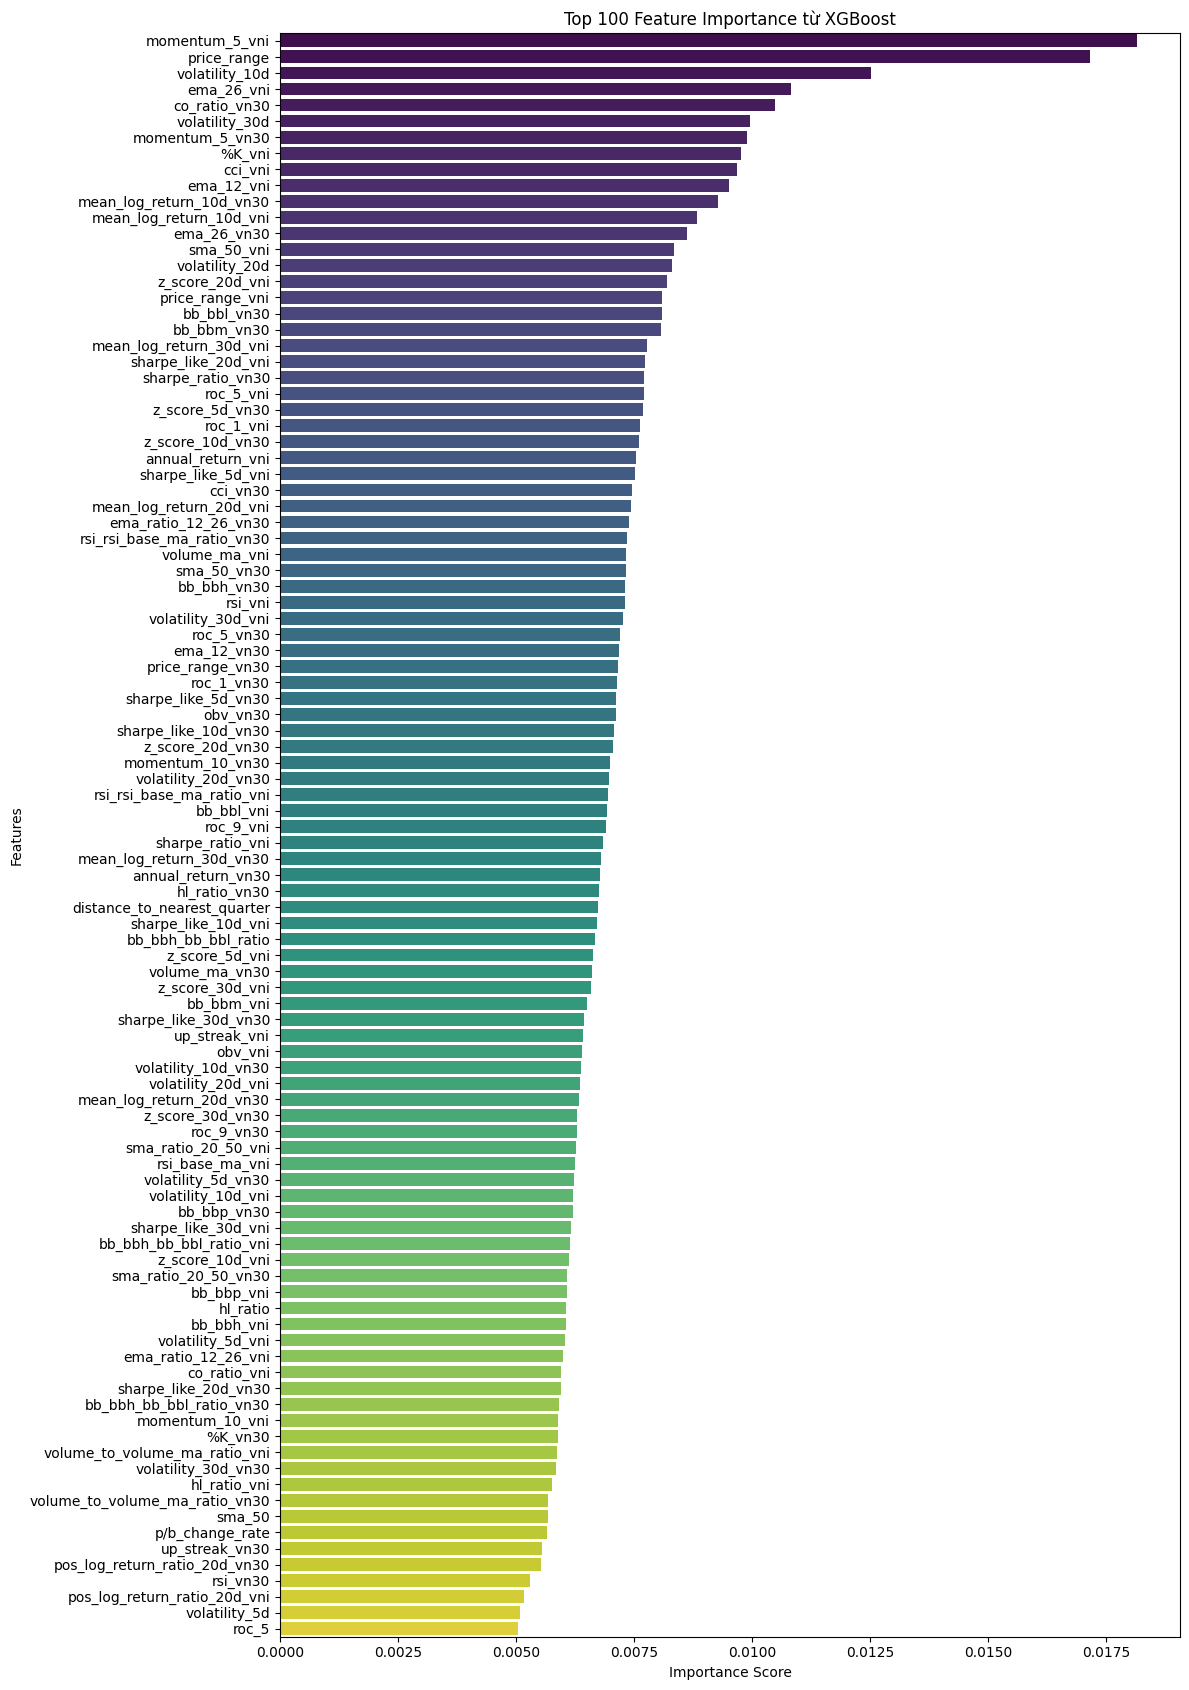

In [46]:
# Lấy top 100 feature để vẽ từ Series gốc
top60_importance = feat_importance.head(100)

plt.figure(figsize=(12, 17))
sns.barplot(x=top60_importance.values, y=top60_importance.index, palette="viridis")
plt.title("Top 100 Feature Importance từ XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

✅ BƯỚC 3: Wrapper Method – Tìm tập con tốt nhất

In [47]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier

# Dùng Random Forest để chọn feature tốt nhất
sfs_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1, random_state=42),
                                         n_features_to_select=60,
                                         direction='forward',
                                         scoring='f1_weighted',
                                         cv=3)
sfs_selector.fit(df_global_train_in_scope_features[selected_by_xgb], df_global_train_in_scope_target)

final_features = df_global_train_in_scope_features[selected_by_xgb].columns[sfs_selector.get_support()].tolist()
print("Top 60 features được chọn:")
for i, feature in enumerate(final_features, 1):
    print(f"{i}. {feature}")

KeyboardInterrupt: 

In [30]:
print(final_features)

['sma_50_vni', 'ema_26_vni', 'ema_12_vn30', 'ema_12_vni', '%R_vni', 'volatility_10d', 'roc_vni', 'volume_ma_vn30', 'bb_bbh_vn30', 'rsi_base_ma_vni', 'obv_vni', 'ema_26_vn30', 'bb_bbl_vni', 'bb_bbl_vn30', 'cci_vni', 'sma_20_vni', 'volume_ma_vni', 'rsi_vn30', 'bb_bbh_bb_bbl_ratio_vn30', 'roc_vn30', 'bb_bbh_bb_bbl_ratio_vni', 'rsi_base_ma_vn30', 'distance_to_nearest_quarter', 'sma_50_vn30', 'obv_vn30', 'rsi_rsi_base_ma_ratio_vn30', 'rsi_vni', 'rsi_rsi_base_ma_ratio_vni', 'bb_bbh_vni', 'bb_bbp_vn30', 'volume_to_volume_ma_ratio_vn30', 'volume_to_volume_ma_ratio_vni', 'bb_bbm_vn30', '%R_vn30', 'bb_bbp_vni', 'cci_vn30', 'daily_return', 'bb_bbl', '%R', 'mean_log_return_30d']


In [31]:
final_features = ['sma_50_vni', 'ema_26_vni', 'ema_12_vn30', 'ema_12_vni', '%R_vni', 'volatility_10d', 'roc_vni', 'volume_ma_vn30', 'bb_bbh_vn30', 'rsi_base_ma_vni', 'obv_vni', 'ema_26_vn30', 'bb_bbl_vni', 'bb_bbl_vn30', 'cci_vni', 'sma_20_vni', 'volume_ma_vni', 'rsi_vn30', 'bb_bbh_bb_bbl_ratio_vn30', 'roc_vn30', 'bb_bbh_bb_bbl_ratio_vni', 'rsi_base_ma_vn30', 'distance_to_nearest_quarter', 'sma_50_vn30', 'obv_vn30', 'rsi_rsi_base_ma_ratio_vn30', 'rsi_vni', 'rsi_rsi_base_ma_ratio_vni', 'bb_bbh_vni', 'bb_bbp_vn30', 'volume_to_volume_ma_ratio_vn30', 'volume_to_volume_ma_ratio_vni', 'bb_bbm_vn30', '%R_vn30', 'bb_bbp_vni', 'cci_vn30', 'daily_return', 'bb_bbl', '%R', 'mean_log_return_30d']

✅ BƯỚC 4: Model-agnostic Explanation (SHAP)

In [ ]:
# final_features = ['bb_bbh_bb_bbl_ratio', 'ema_26_vni', 'bb_bbl_vni', 'roc_vni', 'bb_bbh_vn30', '%K_vni', 'ema_12_vn30', 'bb_bbh_vni', 'bb_bbp_vni', 'sma_50_vni', 'sma_20_vn30', 'volume_ma_vn30', 'bb_bbl_vn30', 'obv_vni', 'cci_vni', 'rsi_vni', 'ema_26_vn30', 'rsi_vn30', 'obv_vn30', 'sma_50_vn30', 'roc_vn30', 'volume_ma_vni', 'distance_to_nearest_quarter', 'rsi_base_ma_vn30', 'rsi_rsi_base_ma_ratio_vni', 'bb_bbp_vn30', 'volume_to_volume_ma_ratio_vn30', 'cci_vn30', 'rsi_rsi_base_ma_ratio_vn30', 'ema_12_vni', 'volume_to_volume_ma_ratio_vni', '%K_vn30', 'rsi_base_ma_vni', 'sma_20_vni', 'roc_5', 'annual_return', 'bb_bbl', 'macd', 'z_score_5d', 'sharpe_like_5d']
final_features = ['sma_50_vni', 'ema_26_vni', 'ema_12_vn30', 'ema_12_vni', '%R_vni', 'volatility_10d', 'roc_vni', 'volume_ma_vn30', 'bb_bbh_vn30', 'rsi_base_ma_vni', 'obv_vni', 'ema_26_vn30', 'bb_bbl_vni', 'bb_bbl_vn30', 'cci_vni', 'sma_20_vni', 'volume_ma_vni', 'rsi_vn30', 'bb_bbh_bb_bbl_ratio_vn30', 'roc_vn30', 'bb_bbh_bb_bbl_ratio_vni', 'rsi_base_ma_vn30', 'distance_to_nearest_quarter', 'sma_50_vn30', 'obv_vn30', 'rsi_rsi_base_ma_ratio_vn30', 'rsi_vni', 'rsi_rsi_base_ma_ratio_vni', 'bb_bbh_vni', 'bb_bbp_vn30', 'volume_to_volume_ma_ratio_vn30', 'volume_to_volume_ma_ratio_vni', 'bb_bbm_vn30', '%R_vn30', 'bb_bbp_vni', 'cci_vn30', 'daily_return', 'bb_bbl', '%R', 'mean_log_return_30d']

In [34]:
import shap

model = XGBClassifier(n_jobs=-1, random_state=42)
model.fit(df_global_train_in_scope_features[final_features], df_global_train_in_scope_target)

# SHAP
explainer = shap.Explainer(model, df_global_train_in_scope_features[final_features])
shap_values = explainer(df_global_train_in_scope_features[final_features])


100%|===================| 107722/107784 [22:47<00:00]        

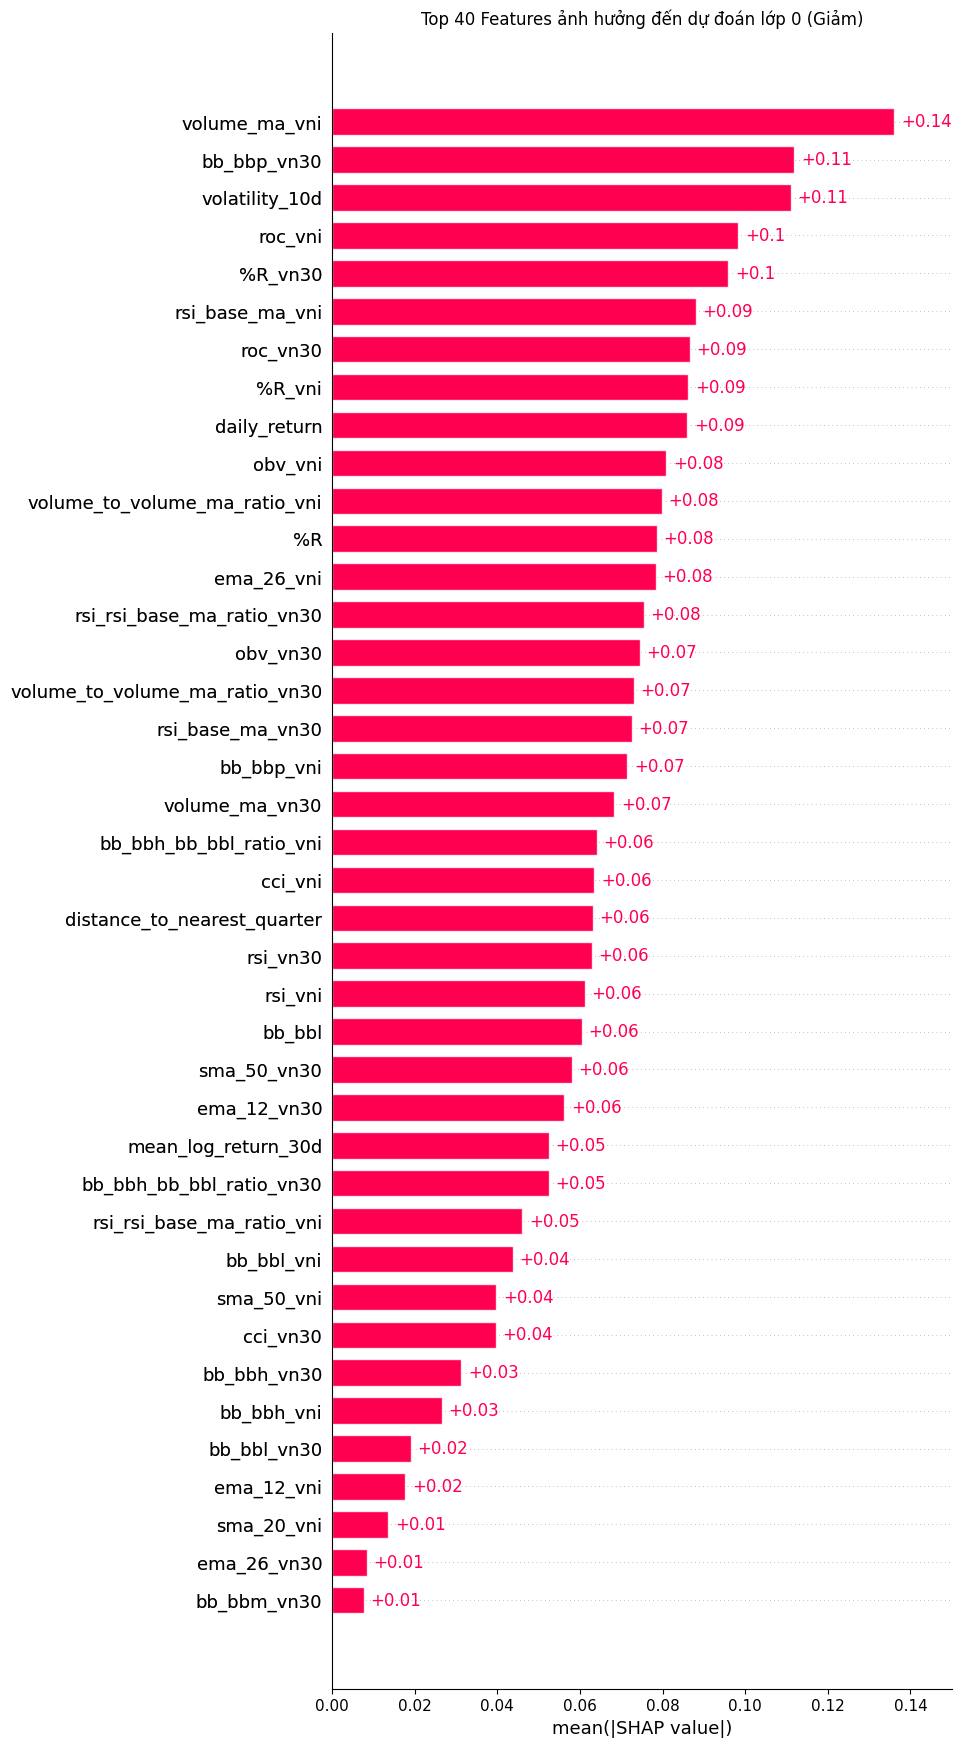

In [35]:

# Lấy SHAP values cho lớp 1
shap_values_class_1 = shap_values[:, :, 0]

# Vẽ biểu đồ và lấy trục
ax = shap.plots.bar(shap_values_class_1, max_display=40, show=False)

# Thêm tiêu đề
plt.title("Top 40 Features ảnh hưởng đến dự đoán lớp 0 (Giảm)")

# Hiển thị biểu đồ
plt.show()

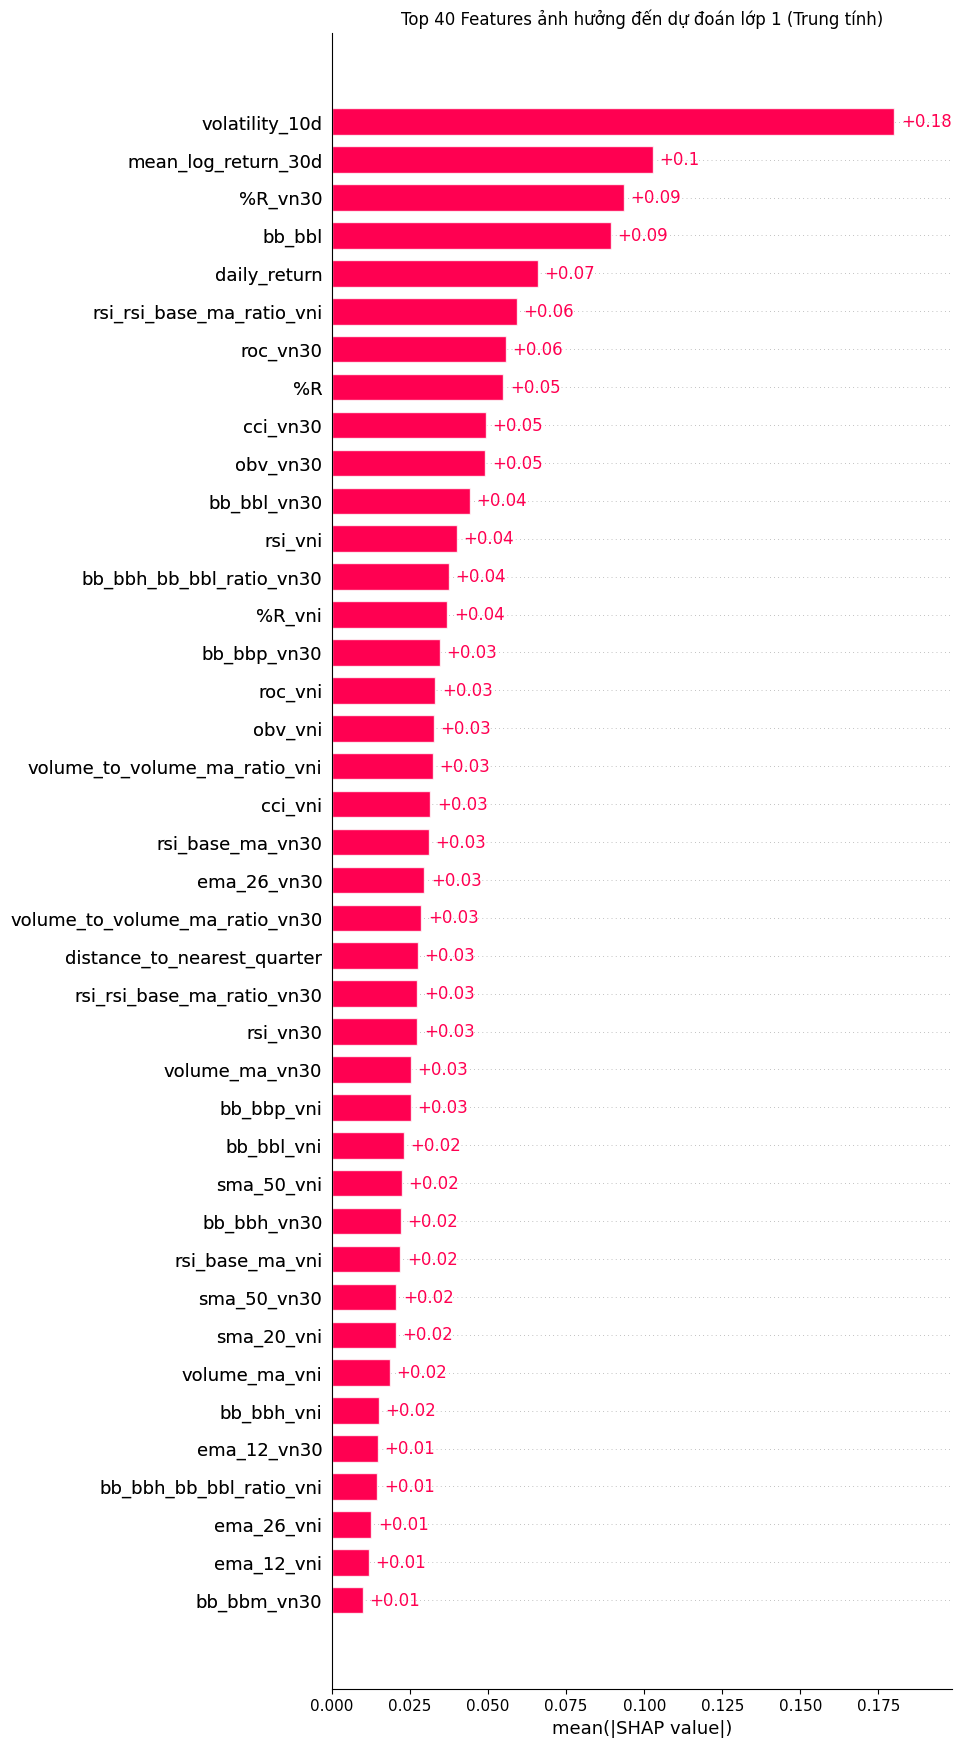

In [36]:

# Lấy SHAP values cho lớp 1
shap_values_class_1 = shap_values[:, :, 1]

# Vẽ biểu đồ và lấy trục
ax = shap.plots.bar(shap_values_class_1, max_display=40, show=False)

# Thêm tiêu đề
plt.title("Top 40 Features ảnh hưởng đến dự đoán lớp 1 (Trung tính)")

# Hiển thị biểu đồ
plt.show()

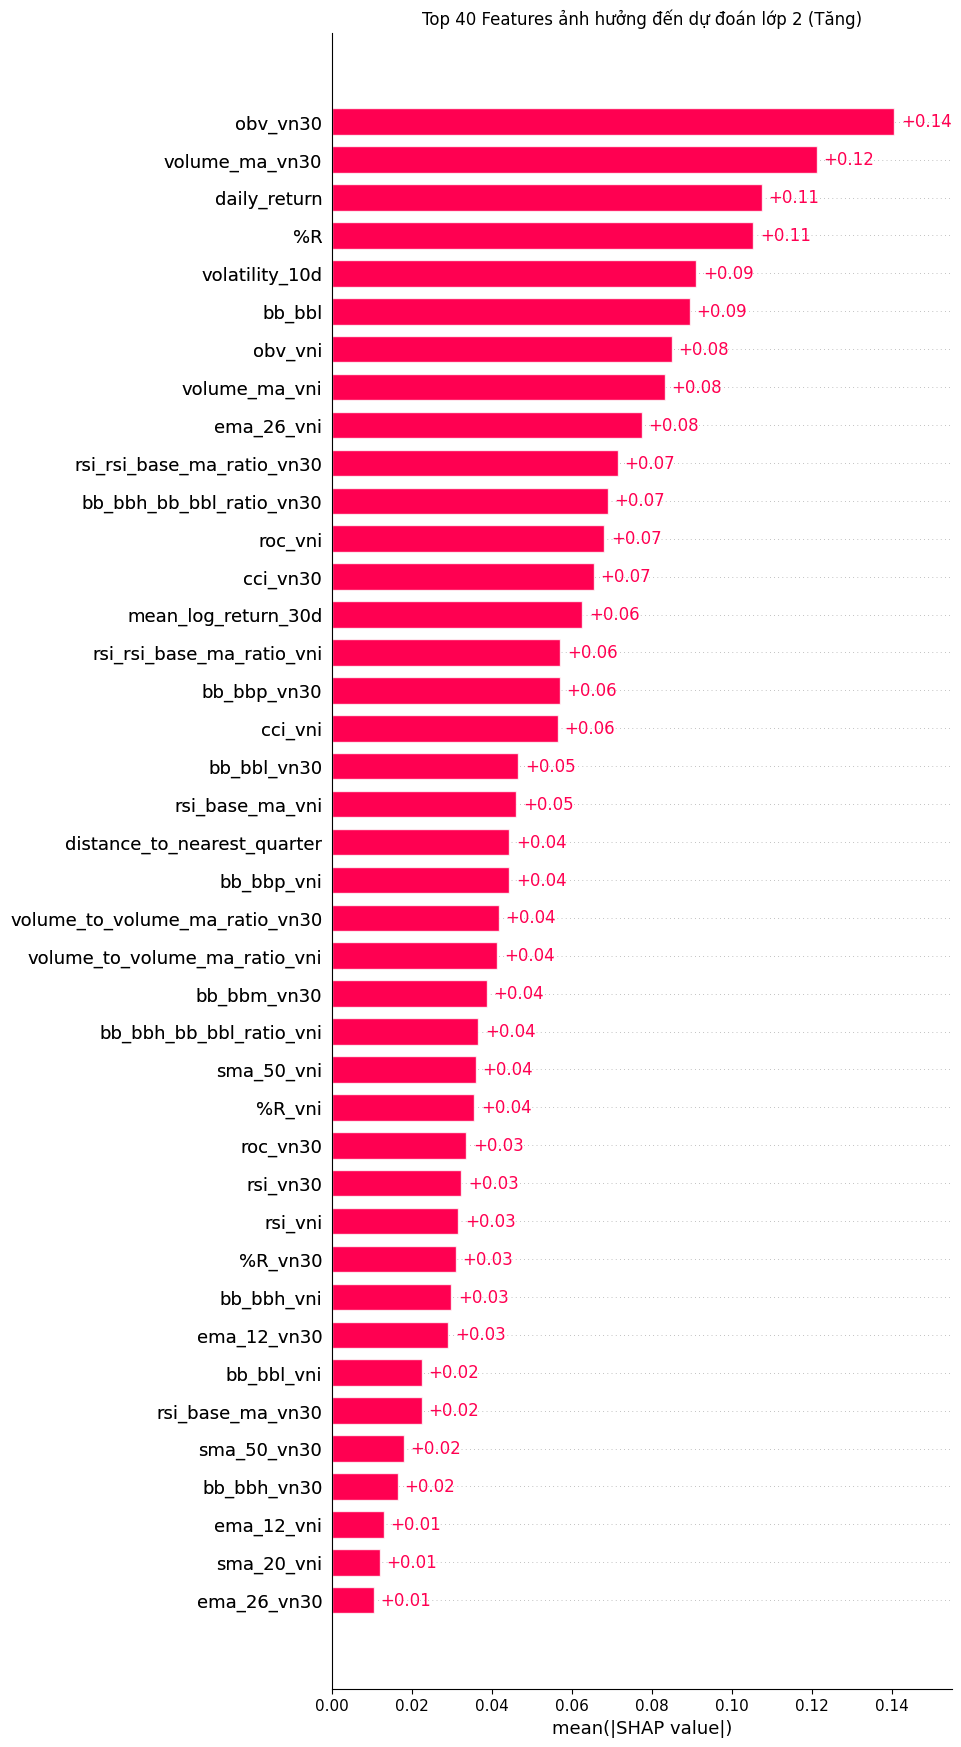

In [37]:

# Lấy SHAP values cho lớp 1
shap_values_class_1 = shap_values[:, :, 2]

# Vẽ biểu đồ và lấy trục
ax = shap.plots.bar(shap_values_class_1, max_display=40, show=False)

# Thêm tiêu đề
plt.title("Top 40 Features ảnh hưởng đến dự đoán lớp 2 (Tăng)")

# Hiển thị biểu đồ
plt.show()

✅ BƯỚC 5: So sánh mô hình

In [38]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

==> So sánh trên tập full feature và selected feature:
Random Forest (FULL): f1_weighted = 0.5325
Random Forest (SELECTED): f1_weighted = 0.5985

XGBoost (FULL): f1_weighted = 0.5193
XGBoost (SELECTED): f1_weighted = 0.5864

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015027 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26087
[LightGBM] [Info] Number of data points in the train set: 28742, number of used features: 113
[LightGBM] [Info] Start training from score -1.439233
[LightGBM] [Info] Start training from score -0.680356
[LightGBM] [Info] Start training from score -1.360806
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26083
[LightGBM] [Info] Number of data points in the train set: 28742, number of used features: 113
[LightGBM] [Info] Start trainin

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMM

AdaBoost (FULL): f1_weighted = 0.4641
AdaBoost (SELECTED): f1_weighted = 0.4713



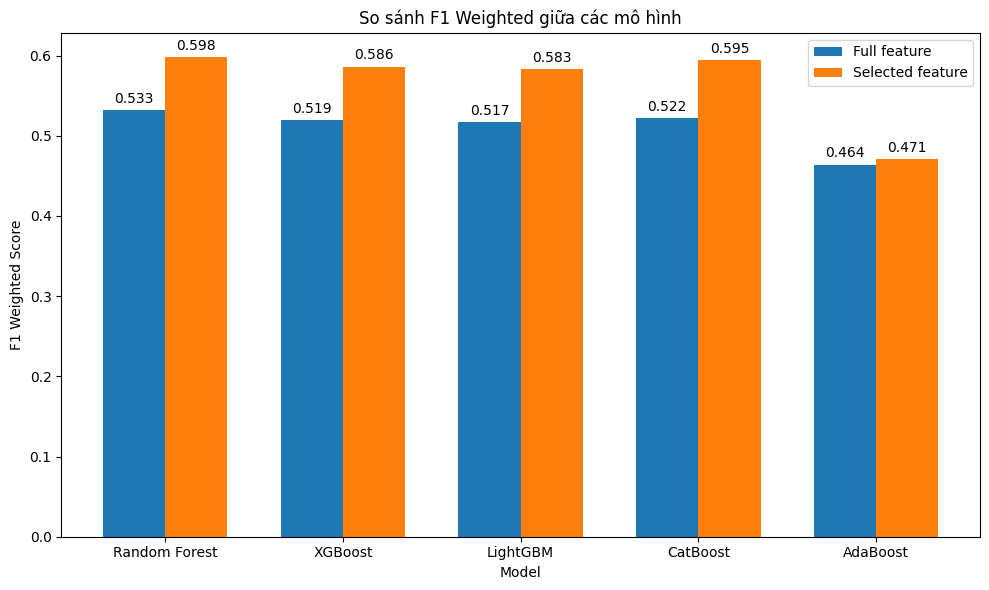

In [33]:
models = {
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42),
    "XGBoost": XGBClassifier(n_jobs=-1, random_state=42),
    "LightGBM": LGBMClassifier(n_jobs=-1, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
}

full_scores = []
selected_scores = []
model_names = []

print("==> So sánh trên tập full feature và selected feature:")
for name, model in models.items():
    score_full = cross_val_score(model, df_global_train_in_scope_features, df_global_train_in_scope_target, scoring='f1_weighted', cv=5).mean()
    score_selected = cross_val_score(model, df_global_train_in_scope_features[final_features], df_global_train_in_scope_target, scoring='f1_weighted', cv=5).mean()
    full_scores.append(score_full)
    selected_scores.append(score_selected)
    model_names.append(name)
    print(f"{name} (FULL): f1_weighted = {score_full:.4f}")
    print(f"{name} (SELECTED): f1_weighted = {score_selected:.4f}\n")

# Vẽ biểu đồ so sánh
import numpy as np

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - width/2, full_scores, width, label='Full feature')
bars2 = ax.bar(x + width/2, selected_scores, width, label='Selected feature')

ax.set_xlabel('Model')
ax.set_ylabel('F1 Weighted Score')
ax.set_title('So sánh F1 Weighted giữa các mô hình')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Gắn giá trị lên từng thanh
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0,3),  # offset text lên 3 điểm
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

plt.tight_layout()
plt.show()

Feature selection for sentiment analysys

In [41]:
df_global_train_in_scope_features_sa = df_global_train[sentiment_features]

In [42]:
df_global_train_in_scope_features_sa.head(5)

,Reputation,Company Communication,Appointment,Financial,Regulatory,Sales,M&A,Legal,Dividend Policy,Risks,...,sum_positive_sa,sum_negative_sa,time_distance_from_sa_to_close_minutes,num_sa_news_p1d,mean_sentiment_norm_p1d,max_sentiment_norm_p1d,std_sentiment_score_p1d,sum_positive_sa_p1d,sum_negative_sa_p1d,time_distance_from_sa_to_close_minutes_p1d
0,0.0,0.0,0.0,0.8,0.2,0.0,0.0,0.0,0.0,0.1,...,3.5,0.0,-2987,0,0.000000,0.000000,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,1,1.466288,1.466288,0.0,3.5,0.0,-2987
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.000000,0.000000,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.000000,0.000000,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.000000,0.000000,0.0,0.0,0.0,0


✅ BƯỚC 1: Embedded Method – Lấy importance từ mô hình

In [43]:
# Fit model để lấy importance
xgb = XGBClassifier(n_jobs=-1, random_state=42)
xgb.fit(df_global_train_in_scope_features_sa, df_global_train_in_scope_target)

# Lấy top 40 feature quan trọng
feat_importance = pd.Series(xgb.feature_importances_, index=sentiment_features).sort_values(ascending=False)
selected_by_xgb = feat_importance.head(40).index.tolist()
print("Top 40 features được chọn:")
for i, feature in enumerate(selected_by_xgb, 1):
    print(f"{i}. {feature}")

Top 40 features được chọn:
1. Company Communication
2. num_sa_news
3. company_communication_p1d
4. Strategy
5. Price Action
6. time_distance_from_sa_to_close_minutes
7. mean_sentiment_norm
8. time_distance_from_sa_to_close_minutes_p1d
9. strategy_p1d
10. reputation_p1d
11. std_sentiment_score
12. sum_positive_sa
13. options_p1d
14. Signal
15. std_sentiment_score_p1d
16. conditions_p1d
17. mean_sentiment_norm_p1d
18. max_sentiment_norm
19. legal_p1d
20. appointment_p1d
21. price_action_p1d
22. Rumors
23. max_sentiment_norm_p1d
24. market_p1d
25. Investor Sentiment
26. Currency
27. black_swan_event_p1d
28. Retail Investor Behavior
29. Market
30. sales_p1d
31. investor_sentiment_p1d
32. Coverage
33. Foreign Institutional Behavior
34. Sales
35. Volatility
36. Options
37. Financial
38. Reputation
39. Technical Analysis
40. risks_p1d




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



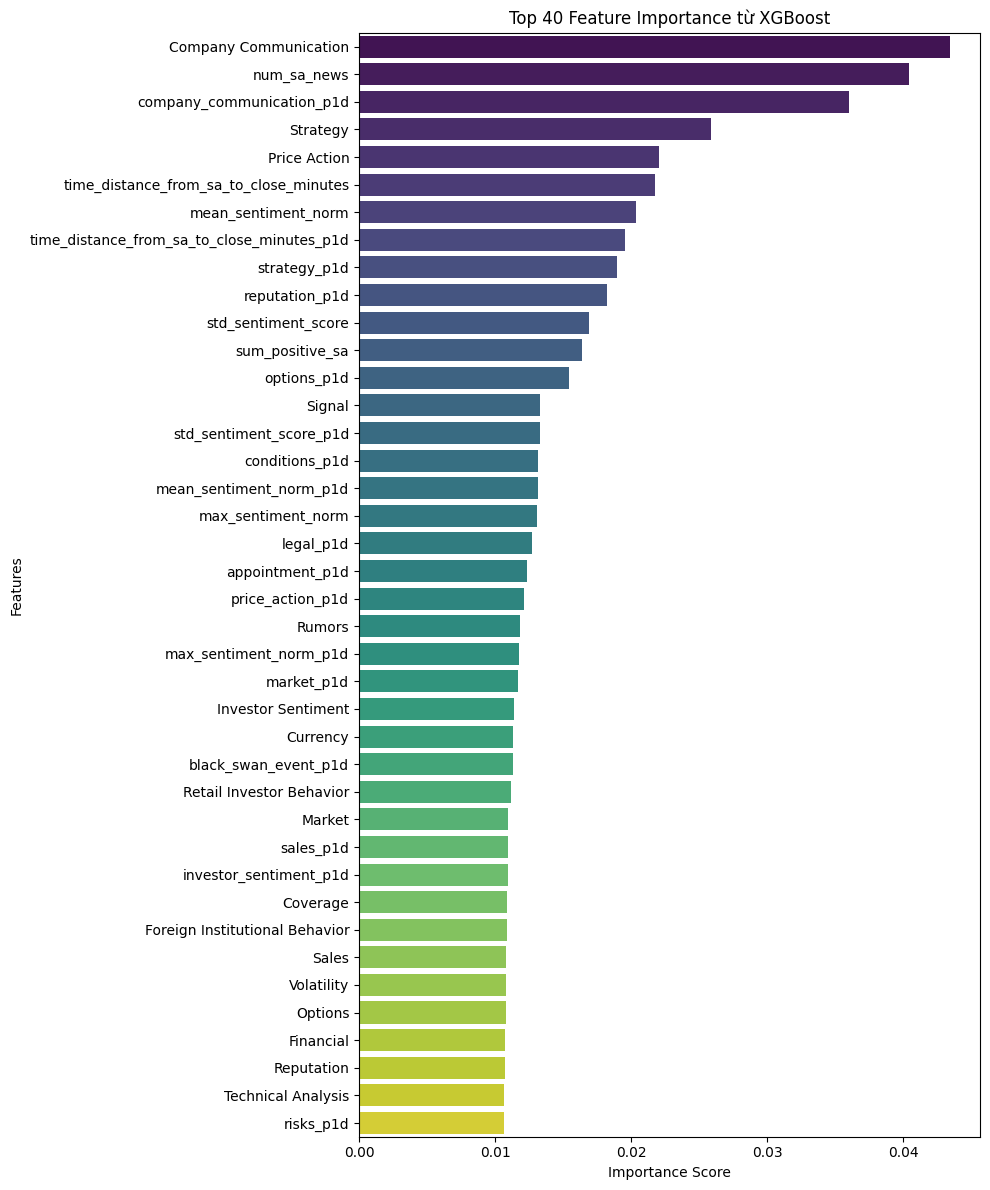

In [44]:
# Lấy top 40 feature để vẽ từ Series gốc
top40_importance = feat_importance.head(40)

plt.figure(figsize=(10, 12))
sns.barplot(x=top40_importance.values, y=top40_importance.index, palette="viridis")
plt.title("Top 40 Feature Importance từ XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

✅ BƯỚC 2: Wrapper Method – Tìm tập con tốt nhất

In [ ]:


# Dùng Random Forest để chọn feature tốt nhất
sfs_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1, random_state=42),
                                         n_features_to_select=20,
                                         direction='forward',
                                         scoring='f1_weighted',
                                         cv=3)
sfs_selector.fit(df_global_train_in_scope_features_sa[selected_by_xgb], df_global_train_in_scope_target)

final_features = df_global_train_in_scope_features_sa[selected_by_xgb].columns[sfs_selector.get_support()].tolist()
print("Top 20 features được chọn:")
for i, feature in enumerate(final_features, 1):
    print(f"{i}. {feature}")

Top 20 features được chọn:
1. Company Communication
2. company_communication_p1d
3. Price Action
4. time_distance_from_sa_to_close_minutes
5. mean_sentiment_norm
6. time_distance_from_sa_to_close_minutes_p1d
7. reputation_p1d
8. std_sentiment_score
9. options_p1d
10. std_sentiment_score_p1d
11. conditions_p1d
12. Rumors
13. Investor Sentiment
14. Coverage
15. Sales
16. Volatility
17. Options
18. Financial
19. Technical Analysis
20. risks_p1d


✅ BƯỚC 3: Model-agnostic Explanation (SHAP)

In [47]:
model = XGBClassifier(n_jobs=-1, random_state=42)
model.fit(df_global_train_in_scope_features_sa[final_features], df_global_train_in_scope_target)

# SHAP
explainer = shap.Explainer(model, df_global_train_in_scope_features_sa[final_features])
shap_values = explainer(df_global_train_in_scope_features_sa[final_features])

100%|===================| 107675/107784 [13:44<00:00]        

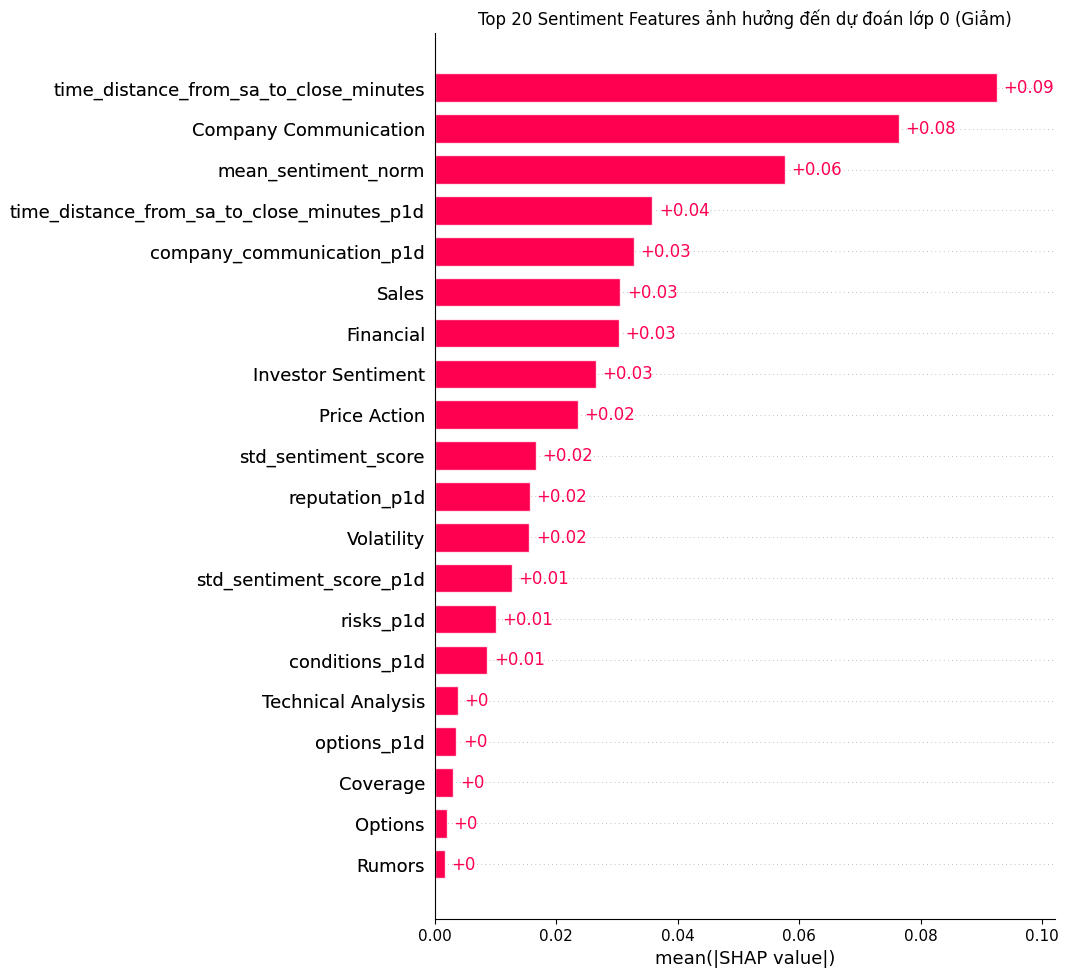

In [48]:
# Lấy SHAP values cho lớp 1
shap_values_class_1 = shap_values[:, :, 0]

# Vẽ biểu đồ và lấy trục
ax = shap.plots.bar(shap_values_class_1, max_display=20, show=False)

# Thêm tiêu đề
plt.title("Top 20 Sentiment Features ảnh hưởng đến dự đoán lớp 0 (Giảm)")

# Hiển thị biểu đồ
plt.show()

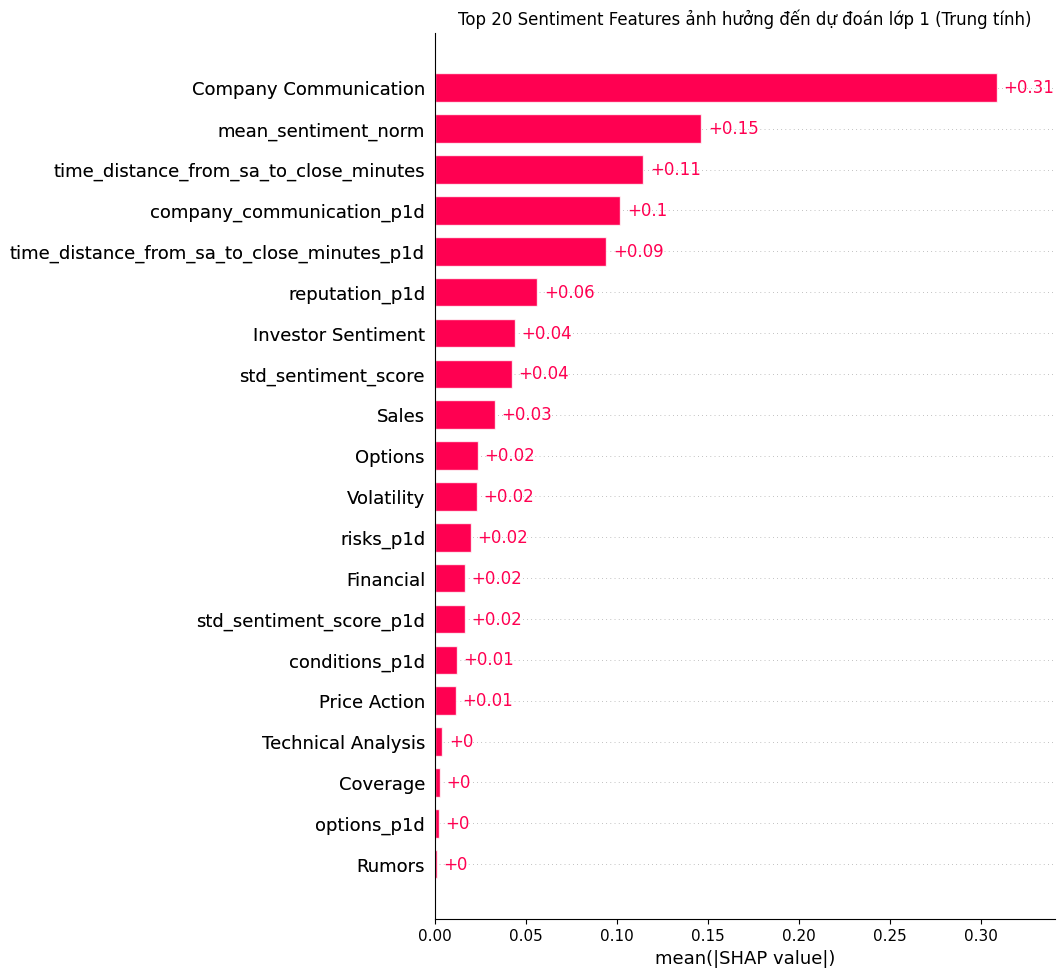

In [49]:

# Lấy SHAP values cho lớp 1
shap_values_class_1 = shap_values[:, :, 1]

# Vẽ biểu đồ và lấy trục
ax = shap.plots.bar(shap_values_class_1, max_display=20, show=False)

# Thêm tiêu đề
plt.title("Top 20 Sentiment Features ảnh hưởng đến dự đoán lớp 1 (Trung tính)")

# Hiển thị biểu đồ
plt.show()

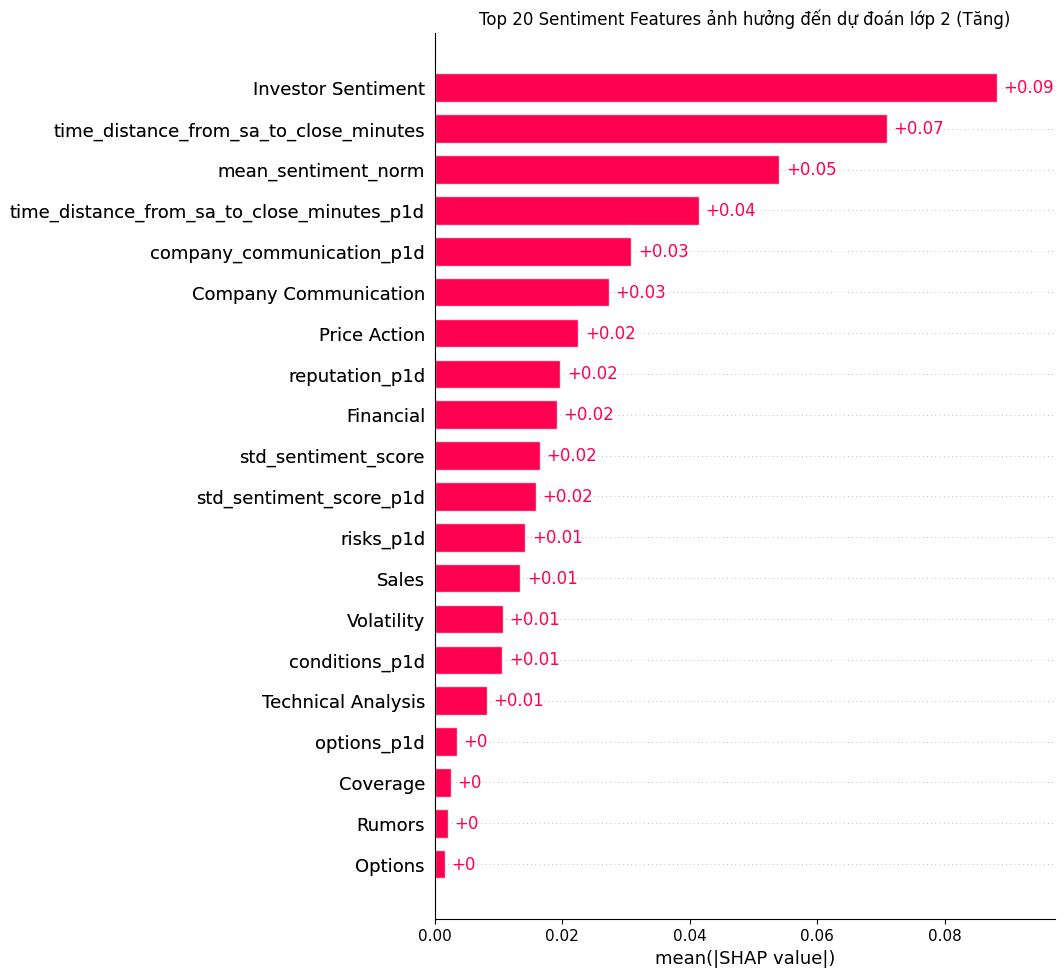

In [50]:

# Lấy SHAP values cho lớp 1
shap_values_class_1 = shap_values[:, :, 2]

# Vẽ biểu đồ và lấy trục
ax = shap.plots.bar(shap_values_class_1, max_display=20, show=False)

# Thêm tiêu đề
plt.title("Top 20 Sentiment Features ảnh hưởng đến dự đoán lớp 2 (Tăng)")

# Hiển thị biểu đồ
plt.show()

Dựa vào feature important và shap chon 20 feature sentiment

In [51]:
sentiment_feature_selected = [
    'Investor Sentiment', 'time_distance_from_sa_to_close_minutes', 'mean_sentiment_norm',
    'time_distance_from_sa_to_close_minutes_p1d', 'company_communication_p1d',
    'Company Communication', 'Price Action', 'reputation_p1d', 'Financial',
    'std_sentiment_score', 'std_sentiment_score_p1d', 
    'risks_p1d', 'Sales', 'Volatility', 'conditions_p1d', 'Technical Analysis',
    'Strategy', 'strategy_p1d', 'sum_positive_sa', 'Signal', 'mean_sentiment_norm_p1d'
]

So sánh hiệu suất mô hình giữa full sentiment feature và selectet sentiment feature

==> So sánh trên tập full feature và selected feature:
Random Forest (FULL): f1_weighted = 0.4516
Random Forest (SELECTED): f1_weighted = 0.4539

XGBoost (FULL): f1_weighted = 0.4488
XGBoost (SELECTED): f1_weighted = 0.4471

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3790
[LightGBM] [Info] Number of data points in the train set: 28742, number of used features: 80
[LightGBM] [Info] Start training from score -1.439233
[LightGBM] [Info] Start training from score -0.680356
[LightGBM] [Info] Start training from score -1.360806
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007820 secon

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMM

AdaBoost (FULL): f1_weighted = 0.4365
AdaBoost (SELECTED): f1_weighted = 0.4386



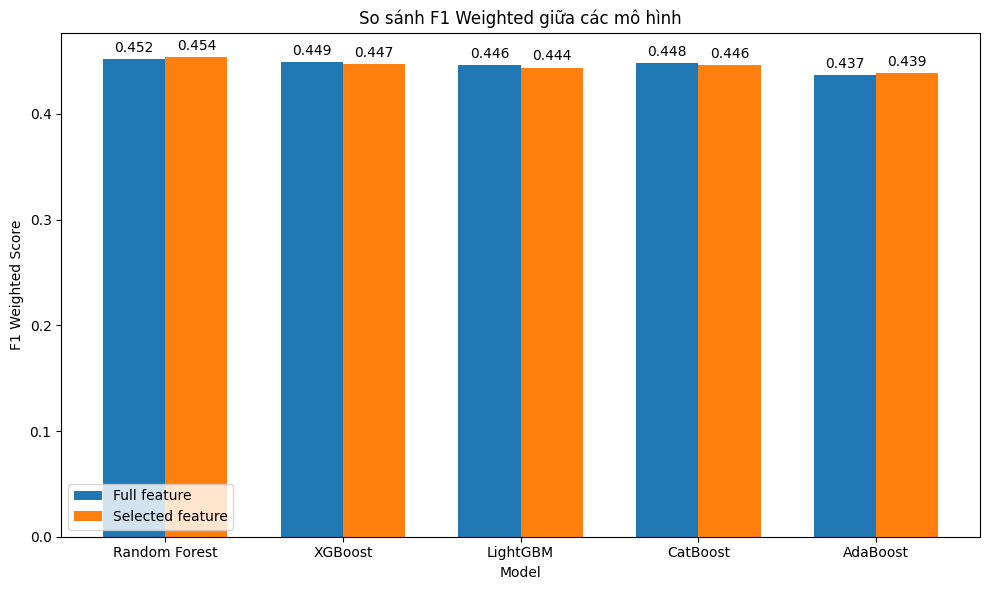

In [43]:
models = {
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42),
    "XGBoost": XGBClassifier(n_jobs=-1, random_state=42),
    "LightGBM": LGBMClassifier(n_jobs=-1, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
}

full_scores = []
selected_scores = []
model_names = []

print("==> So sánh trên tập full feature và selected feature:")
for name, model in models.items():
    score_full = cross_val_score(model, df_global_train_in_scope_features_sa, df_global_train_in_scope_target, scoring='f1_weighted', cv=5).mean()
    score_selected = cross_val_score(model, df_global_train_in_scope_features_sa[sentiment_feature_selected], df_global_train_in_scope_target, scoring='f1_weighted', cv=5).mean()
    full_scores.append(score_full)
    selected_scores.append(score_selected)
    model_names.append(name)
    print(f"{name} (FULL): f1_weighted = {score_full:.4f}")
    print(f"{name} (SELECTED): f1_weighted = {score_selected:.4f}\n")

# Vẽ biểu đồ so sánh
import numpy as np

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - width/2, full_scores, width, label='Full feature')
bars2 = ax.bar(x + width/2, selected_scores, width, label='Selected feature')

ax.set_xlabel('Model')
ax.set_ylabel('F1 Weighted Score')
ax.set_title('So sánh F1 Weighted giữa các mô hình')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Gắn giá trị lên từng thanh
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0,3),  # offset text lên 3 điểm
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

plt.tight_layout()
plt.show()

Chọn feature

In [38]:


sentiment_feature_selected = [
    'Investor Sentiment', 'time_distance_from_sa_to_close_minutes', 'mean_sentiment_norm',
    'time_distance_from_sa_to_close_minutes_p1d', 'company_communication_p1d',
    'Company Communication', 'Price Action', 'reputation_p1d', 'Financial',
    'std_sentiment_score', 'std_sentiment_score_p1d', 
    'risks_p1d', 'Sales', 'Volatility', 'conditions_p1d', 'Technical Analysis',
    'Strategy', 'strategy_p1d', 'sum_positive_sa', 'Signal', 'mean_sentiment_norm_p1d'
]


ta_fa_feature_selected = ['sma_50_vni', 'ema_26_vni', 'ema_12_vn30', 'ema_12_vni', '%R_vni', 'volatility_10d', 'roc_vni', 'volume_ma_vn30',
                        'bb_bbh_vn30', 'rsi_base_ma_vni', 'obv_vni', 'ema_26_vn30', 'bb_bbl_vni', 'bb_bbl_vn30', 'cci_vni', 'sma_20_vni', 
                        'volume_ma_vni', 'rsi_vn30', 'bb_bbh_bb_bbl_ratio_vn30', 'roc_vn30', 'bb_bbh_bb_bbl_ratio_vni', 'rsi_base_ma_vn30', 
                        'distance_to_nearest_quarter', 'sma_50_vn30', 'obv_vn30', 'rsi_rsi_base_ma_ratio_vn30', 'rsi_vni', 
                        'rsi_rsi_base_ma_ratio_vni', 'bb_bbh_vni', 'bb_bbp_vn30', 'volume_to_volume_ma_ratio_vn30', 
                        'volume_to_volume_ma_ratio_vni', 'bb_bbm_vn30', '%R_vn30', 'bb_bbp_vni', 'cci_vn30', 'daily_return', 
                        'bb_bbl', '%R', 'mean_log_return_30d'
                    ]